In [3]:
import sys
print(sys.executable)


c:\Users\Admin\AppData\Local\Programs\Python\Python311\python.exe


In [5]:
# import json
# import os
# from geopy.distance import geodesic


# # Set your folder path
# folder_path = r"C:\Users\Admin\OneDrive - United States International University (USIU)\Documents\USIU_A\US2025\DSA2020A Leah\Projects\Data"

# # Create empty list to store each feature
# features = []

# def compute_length(coords):
#     total = 0
#     for i in range(len(coords) - 1):
#         total += geodesic(coords[i][::-1], coords[i+1][::-1]).meters  # reverse (lon, lat) to (lat, lon)
#     return total

# # Iterate over each GeoJSON file
# for filename in os.listdir(folder_path):
#     if filename.endswith('.json') or filename.endswith('.geojson'):
#         filepath = os.path.join(folder_path, filename)
#         with open(filepath, 'r', encoding='utf-8') as f:
#             data = json.load(f)
#             feature = {
#                 "type": "Feature",
#                 "properties": {
#                     "name": filename.replace('.json', '').replace('.geojson', ''),
#                     "length_m": compute_length(data["geometry"]["coordinates"])
#                 },
#                 "geometry": data["geometry"]
#             }
#             features.append(feature)

# # Create final FeatureCollection
# combined_geojson = {
#     "type": "FeatureCollection",
#     "features": features
# }

# # Save to file
# output_file = os.path.join(folder_path, "combined_usiu_paths.geojson")
# with open(output_file, 'w', encoding='utf-8') as f:
#     json.dump(combined_geojson, f, indent=2)

# print("✅ Combined GeoJSON saved to:", output_file)


In [6]:
import geopandas as gpd

# File path
geojson_path = r"C:\Users\Admin\OneDrive - United States International University (USIU)\Documents\USIU_A\US2025\DSA2020A Leah\Projects\Data\combined_usiu_paths.geojson"

# Read file
gdf = gpd.read_file(geojson_path)

# Show basic info
print(gdf.head())


                              name    length_m  \
0  cafe lata Parking plot luandary  327.515858   
1    d and c to admin stining area   63.264897   
2               D and c to E and F   26.033880   
3               E and F to K and l   30.298816   
4                 E and F to Lab z   39.606371   

                                            geometry  
0  LINESTRING (36.87749 -1.21769, 36.87761 -1.217...  
1  LINESTRING (36.8796 -1.21856, 36.8796 -1.21854...  
2   LINESTRING (36.8797 -1.21845, 36.87975 -1.21822)  
3  LINESTRING (36.87975 -1.21823, 36.87979 -1.218...  
4  LINESTRING (36.87975 -1.21823, 36.87976 -1.218...  


In [7]:
# Extract start and end points from LineString geometry
gdf['start'] = gdf.geometry.apply(lambda x: x.coords[0])
gdf['end'] = gdf.geometry.apply(lambda x: x.coords[-1])

# Preview result
print(gdf[['start', 'end']].head())

                  start                   end
0  (36.87749, -1.21769)  (36.87937, -1.21973)
1   (36.8796, -1.21856)  (36.87928, -1.21878)
2   (36.8797, -1.21845)  (36.87975, -1.21822)
3  (36.87975, -1.21823)  (36.87979, -1.21796)
4  (36.87975, -1.21823)  (36.87954, -1.21832)


<Axes: >

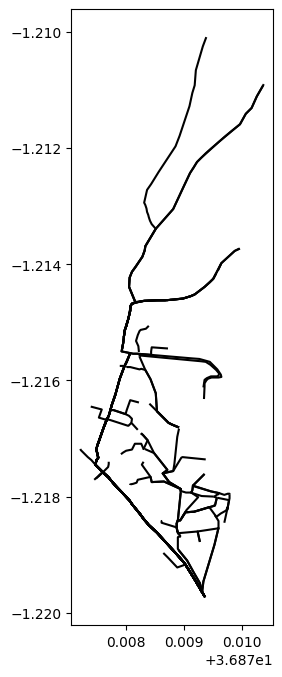

In [8]:
gdf.plot(figsize=(10, 8), edgecolor='black')


In [9]:
# Create a directed graph (change to nx.Graph() for undirected)
G = nx.DiGraph()

# Loop through each path and add as edge with optional attributes
for idx, row in gdf.iterrows():
    start = row['start']
    end = row['end']
    length = row['geometry'].length  # optionally store length
    G.add_edge(start, end, length=length)

# ✅ Check basic graph info
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# ✅ Optional: preview some edges
for u, v, data in list(G.edges(data=True))[:5]:
    print(f"{u} -> {v}, length: {data['length']:.2f}")

Number of nodes: 98
Number of edges: 78
(36.87749, -1.21769) -> (36.87937, -1.21973), length: 0.00
(36.8796, -1.21856) -> (36.87928, -1.21878), length: 0.00
(36.8797, -1.21845) -> (36.87975, -1.21822), length: 0.00
(36.87975, -1.21823) -> (36.87979, -1.21796), length: 0.00
(36.87975, -1.21823) -> (36.87954, -1.21832), length: 0.00


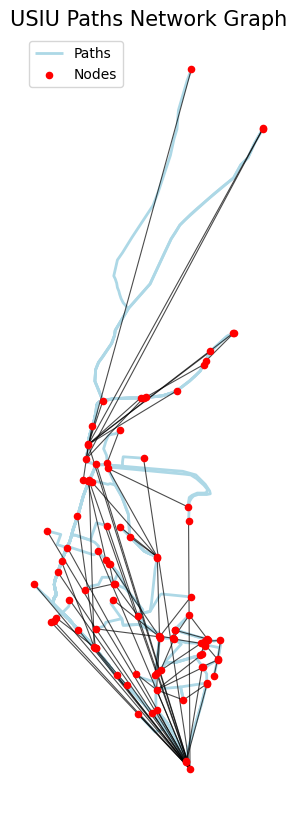

In [10]:
import matplotlib.pyplot as plt

# Create plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot original paths from GeoDataFrame
gdf.plot(ax=ax, color='lightblue', linewidth=2, label="Paths")

# Plot graph edges (same as paths)
for u, v in G.edges():
    x_vals = [u[0], v[0]]
    y_vals = [u[1], v[1]]
    ax.plot(x_vals, y_vals, color='black', linewidth=0.8, alpha=0.7)

# Plot graph nodes
x_nodes = [node[0] for node in G.nodes()]
y_nodes = [node[1] for node in G.nodes()]
ax.scatter(x_nodes, y_nodes, color='red', s=20, zorder=5, label="Nodes")

# Decorations
ax.set_title("USIU Paths Network Graph", fontsize=15)
ax.legend()
ax.axis("off")

plt.show()


In [12]:
import networkx as nx
G = nx.Graph()
for _, row in gdf.iterrows():
    G.add_edge(row['start'], row['end'], weight=row['length_m'], name=row['name'])


In [13]:
import networkx as nx

# Assuming gdf is your GeoDataFrame from Step 2
G = nx.Graph()

for idx, row in gdf.iterrows():
    start = row['start']
    end = row['end']
    length = row['length_m'] if 'length_m' in row else row.geometry.length  # fallback if length_m missing
    name = row['name'] if 'name' in row else 'unknown_path'
    path_type = row['type'] if 'type' in row else 'unknown'

    # Add edge with attributes
    G.add_edge(start, end, weight=length, name=name, type=path_type)

print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")


Graph created with 98 nodes and 78 edges.


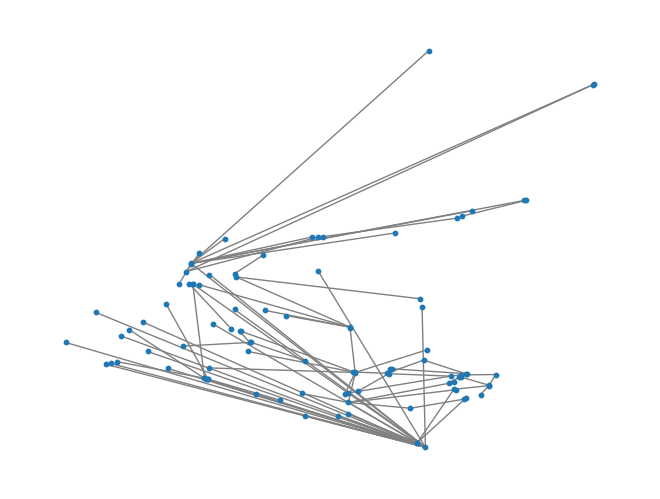

In [14]:
import matplotlib.pyplot as plt

pos = {node: node for node in G.nodes()}  # node is (x,y) coordinate tuple
nx.draw(G, pos, node_size=10, edge_color='gray')
plt.show()


In [15]:
import networkx as nx

def find_shortest_path(graph, start_coord, end_coord):
    try:
        path = nx.dijkstra_path(graph, start_coord, end_coord, weight='weight')
        length = nx.dijkstra_path_length(graph, start_coord, end_coord, weight='weight')
        print(f"Shortest path from {start_coord} to {end_coord} (distance {length:.2f} meters):")
        for step in path:
            print(step)
        return path, length
    except nx.NetworkXNoPath:
        print(f"No path found between {start_coord} and {end_coord}.")
        return None, None

# Example usage:
start_point = list(G.nodes())[0]  # just picking first node as example
end_point = list(G.nodes())[-1]   # last node

find_shortest_path(G, start_point, end_point)


No path found between (36.87749, -1.21769) and (36.87797, -1.21527).


(None, None)

In [20]:
import matplotlib.pyplot as plt

def plot_route(gdf, graph, path):
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot all campus paths in light gray
    gdf.plot(ax=ax, color='lightgray', linewidth=1)

    # If path exists, plot it
    if path:
        # Create a list of LineStrings for the route segments
        for i in range(len(path) - 1):
            x_coords = [path[i][0], path[i+1][0]]
            y_coords = [path[i][1], path[i+1][1]]
            ax.plot(x_coords, y_coords, color='blue', linewidth=3)

        # Mark start and end
        ax.plot(path[0][0], path[0][1], 'go', markersize=10, label='Start')
        ax.plot(path[-1][0], path[-1][1], 'ro', markersize=10, label='End')

    ax.set_title("USIU Smart Campus Route")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.legend()
    plt.grid(True)
    plt.show()


No path found between (36.87749, -1.21769) and (36.87797, -1.21527).


C:\Users\Admin\AppData\Local\Temp\ipykernel_25188\4165736811.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


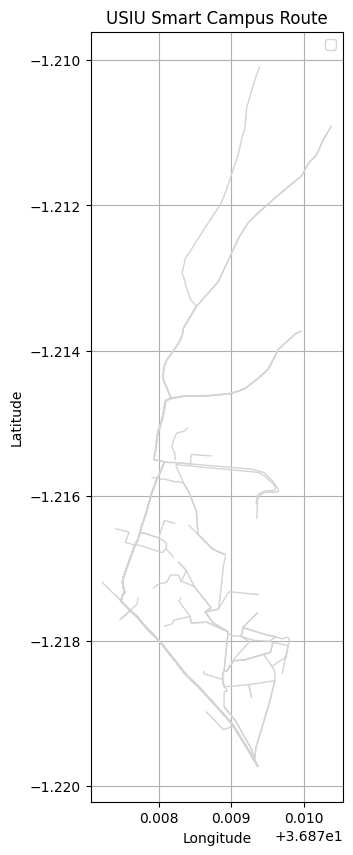

In [21]:
# Choose two real node coordinates from your graph
start = list(G.nodes())[0]
end = list(G.nodes())[-1]

# Get the shortest path
shortest_path, dist = find_shortest_path(G, start, end)

# Plot the path on campus
plot_route(gdf, G, shortest_path)


In [22]:
from math import sqrt

def euclidean_heuristic(a, b):
    return sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)


In [23]:
def find_a_star_path(graph, start_coord, end_coord):
    try:
        path = nx.astar_path(graph, start_coord, end_coord, heuristic=euclidean_heuristic, weight='weight')
        length = nx.astar_path_length(graph, start_coord, end_coord, heuristic=euclidean_heuristic, weight='weight')
        print(f"A* path from {start_coord} to {end_coord} (distance {length:.2f} meters):")
        for step in path:
            print(step)
        return path, length
    except nx.NetworkXNoPath:
        print(f"No A* path found between {start_coord} and {end_coord}.")
        return None, None


No A* path found between (36.87749, -1.21769) and (36.87797, -1.21527).


C:\Users\Admin\AppData\Local\Temp\ipykernel_25188\4165736811.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


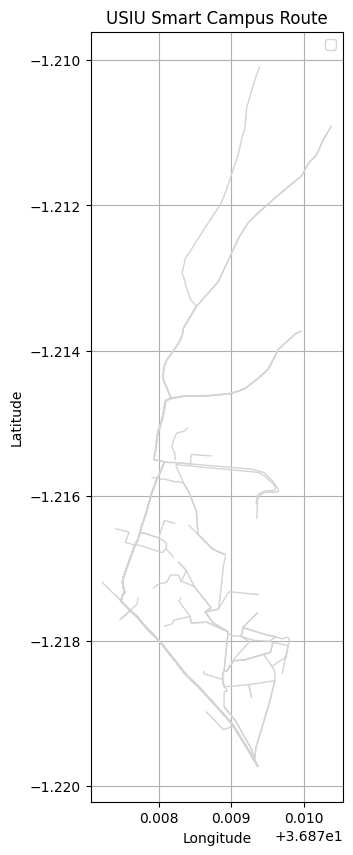

In [24]:
start = list(G.nodes())[0]
end = list(G.nodes())[-1]

astar_path, astar_dist = find_a_star_path(G, start, end)

plot_route(gdf, G, astar_path)  # Reuse the same plotting function


In [25]:
def adjust_for_traffic(G, time_of_day: str, day: str):
    """Adjust graph edge weights based on traffic conditions."""
    rush_hours = ['08:00-10:00', '12:00-14:00', '16:00-18:00']
    weekend_days = ['Saturday', 'Sunday']

    for u, v, data in G.edges(data=True):
        base_weight = data.get('weight', 1.0)
        path_type = data.get('type', 'unknown')

        # Increase weight based on traffic logic
        traffic_multiplier = 1.0

        if day not in weekend_days:
            if time_of_day in rush_hours and path_type == 'walkway':
                traffic_multiplier = 1.5
            elif time_of_day in rush_hours and path_type == 'road':
                traffic_multiplier = 1.3
        else:
            if path_type == 'road':
                traffic_multiplier = 1.1  # slight traffic even on weekends

        # Apply multiplier
        G[u][v]['weight'] = base_weight * traffic_multiplier


No A* path found between (36.87749, -1.21769) and (36.87797, -1.21527).


C:\Users\Admin\AppData\Local\Temp\ipykernel_25188\4165736811.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


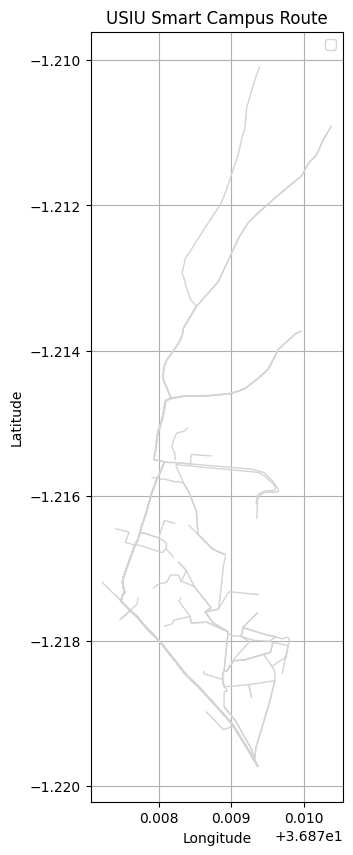

In [26]:
# Example: simulate Monday at 08:00 (rush hour)
adjust_for_traffic(G, time_of_day='08:00-10:00', day='Monday')

# Then run A* or Dijkstra again
start = list(G.nodes())[0]
end = list(G.nodes())[-1]

adjusted_path, adjusted_dist = find_a_star_path(G, start, end)

plot_route(gdf, G, adjusted_path)


In [27]:
# Example: Assume 'walkway' and 'ramp' are wheelchair-friendly
gdf['accessible'] = gdf['type'].apply(lambda t: t in ['walkway', 'ramp'])


KeyError: 'type'

In [29]:
def build_accessible_graph(gdf):
    G = nx.Graph()

    for _, row in gdf.iterrows():
        if not row.get('accessible', False):
            continue  # Skip inaccessible paths

        start = row['start']
        end = row['end']
        length = row['length_m'] if 'length_m' in row else row.geometry.length
        name = row.get('name', 'unknown')
        path_type = row.get('type', 'unknown')

        G.add_edge(start, end, weight=length, name=name, type=path_type)

    print(f"Accessible Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
    return G


In [30]:
# Step 1: Add accessible tag
gdf['accessible'] = gdf['type'].apply(lambda t: t in ['walkway', 'ramp'])

# Step 2: Build new accessible graph
accessible_G = build_accessible_graph(gdf)

# Step 3: Find route
start = list(accessible_G.nodes())[0]
end = list(accessible_G.nodes())[-1]

accessible_path, dist = find_a_star_path(accessible_G, start, end)

# Step 4: Visualize
plot_route(gdf, accessible_G, accessible_path)


KeyError: 'type'

In [31]:
def smart_navigator_cli(gdf, full_graph, accessible_graph):
    print("🚀 Welcome to the USIU Smart Campus Navigator CLI")
    print("-------------------------------------------------")

    try:
        # 1. Input: Start and End Coordinates
        start_input = input("Enter start coordinates (e.g., 36.8556,-1.2205): ")
        end_input = input("Enter end coordinates (e.g., 36.8568,-1.2217): ")

        start = tuple(map(float, start_input.strip().split(',')))
        end = tuple(map(float, end_input.strip().split(',')))

        # 2. Input: Mode of transport
        print("\nChoose Mode:")
        print("[1] Regular Route")
        print("[2] Wheelchair Accessible")
        mode = input("Enter option number (1 or 2): ")

        # 3. Select appropriate graph
        if mode == '2':
            G = accessible_graph
            print("\nYou selected: Wheelchair Accessible Route")
        else:
            G = full_graph
            print("\nYou selected: Regular Route")

        # 4. Pathfinding
        if start not in G.nodes() or end not in G.nodes():
            print("\n⚠️ One or both coordinates are not connected to the graph.")
            print("Hint: Try copy-pasting from existing coordinates in the dataset.")
            return

        path, dist = find_a_star_path(G, start, end)

        # 5. Visualization
        plot_route(gdf, G, path)

    except Exception as e:
        print(f"\n❌ Error: {e}")
        print("Please enter coordinates in the correct format.")


In [32]:
# Prepare graphs first
gdf['accessible'] = gdf['type'].apply(lambda t: t in ['walkway', 'ramp'])
accessible_G = build_accessible_graph(gdf)

# Launch CLI
smart_navigator_cli(gdf, G, accessible_G)


KeyError: 'type'

### Java

In [ ]:
# Enter start coordinates (e.g., 36.8556,-1.2205): 36.8550,-1.2200
# Enter end coordinates (e.g., 36.8568,-1.2217): 36.8565,-1.2218
# Enter option number (1 or 2): 2


In [33]:
pip install flask folium


In [34]:
import networkx as nx

# Assuming gdf is your GeoDataFrame from Step 2
G = nx.Graph()

for idx, row in gdf.iterrows():
    start = row['start']
    end = row['end']
    length = row['length_m'] if 'length_m' in row else row.geometry.length  # fallback if length_m missing
    name = row['name'] if 'name' in row else 'unknown_path'
    path_type = row['type'] if 'type' in row else 'unknown'

    # Add edge with attributes
    G.add_edge(start, end, weight=length, name=name, type=path_type)

print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")


Graph created with 98 nodes and 78 edges.


from flask import Flask, render_template, request
import geopandas as gpd
import networkx as nx
import folium

# Load GeoJSON and prepare graphs
gdf = gpd.read_file('data/combined_usiu_paths.geojson')
gdf['start'] = gdf.geometry.apply(lambda x: x.coords[0])
gdf['end'] = gdf.geometry.apply(lambda x: x.coords[-1])
gdf['accessible'] = gdf['type'].apply(lambda t: t in ['walkway', 'ramp'])

# Build full graph
G = nx.Graph()
for _, row in gdf.iterrows():
    G.add_edge(row['start'], row['end'], weight=row.geometry.length, name=row.get('name', ''), type=row.get('type', ''))

# Accessible graph
accessible_G = nx.Graph()
for _, row in gdf[gdf['accessible']].iterrows():
    accessible_G.add_edge(row['start'], row['end'], weight=row.geometry.length, name=row.get('name', ''), type=row.get('type', ''))

# Pathfinding (A*)
from math import sqrt
def heuristic(a, b):
    return sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

def find_path(G, start, end):
    try:
        path = nx.astar_path(G, start, end, heuristic=heuristic, weight='weight')
        return path
    except:
        return None

# Flask app
app = Flask(__name__)

@app.route("/", methods=["GET", "POST"])
def index():
    message = ""
    if request.method == "POST":
        start = tuple(map(float, request.form["start"].split(',')))
        end = tuple(map(float, request.form["end"].split(',')))
        mode = request.form["mode"]

        graph = accessible_G if mode == "wheelchair" else G

        if start not in graph.nodes or end not in graph.nodes:
            message = "⚠️ Invalid coordinates or not in graph."
        else:
            path = find_path(graph, start, end)
            if path:
                m = folium.Map(location=path[0], zoom_start=18)
                folium.Marker(path[0], tooltip="Start", icon=folium.Icon(color='green')).add_to(m)
                folium.Marker(path[-1], tooltip="End", icon=folium.Icon(color='red')).add_to(m)
                folium.PolyLine(locations=[(y, x) for x, y in path], color='blue', weight=5).add_to(m)
                m.save('static/route_map.html')
                return render_template("index.html", message="✅ Route found!", show_map=True)
            else:
                message = "❌ No path found."

    return render_template("index.html", message=message, show_map=False)

if __name__ == "__main__":
    app.run(debug=True)


KeyError: 'type'

In [ ]:
from flask import Flask, render_template, request
import geopandas as gpd
import networkx as nx
import folium

# Load GeoJSON and prepare graphs
gdf = gpd.read_file('data/combined_usiu_paths.geojson')
gdf['start'] = gdf.geometry.apply(lambda x: x.coords[0])
gdf['end'] = gdf.geometry.apply(lambda x: x.coords[-1])
gdf['accessible'] = gdf['type'].apply(lambda t: t in ['walkway', 'ramp'])

# Build full graph
G = nx.Graph()
for _, row in gdf.iterrows():
    G.add_edge(row['start'], row['end'], weight=row.geometry.length, name=row.get('name', ''), type=row.get('type', ''))

# Accessible graph
accessible_G = nx.Graph()
for _, row in gdf[gdf['accessible']].iterrows():
    accessible_G.add_edge(row['start'], row['end'], weight=row.geometry.length, name=row.get('name', ''), type=row.get('type', ''))

# Pathfinding (A*)
from math import sqrt
def heuristic(a, b):
    return sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

def find_path(G, start, end):
    try:
        path = nx.astar_path(G, start, end, heuristic=heuristic, weight='weight')
        return path
    except:
        return None

# Flask app
app = Flask(__name__)

@app.route("/", methods=["GET", "POST"])
def index():
    message = ""
    if request.method == "POST":
        start = tuple(map(float, request.form["start"].split(',')))
        end = tuple(map(float, request.form["end"].split(',')))
        mode = request.form["mode"]

        graph = accessible_G if mode == "wheelchair" else G

        if start not in graph.nodes or end not in graph.nodes:
            message = "⚠️ Invalid coordinates or not in graph."
        else:
            path = find_path(graph, start, end)
            if path:
                m = folium.Map(location=path[0], zoom_start=18)
                folium.Marker(path[0], tooltip="Start", icon=folium.Icon(color='green')).add_to(m)
                folium.Marker(path[-1], tooltip="End", icon=folium.Icon(color='red')).add_to(m)
                folium.PolyLine(locations=[(y, x) for x, y in path], color='blue', weight=5).add_to(m)
                m.save('static/route_map.html')
                return render_template("index.html", message="✅ Route found!", show_map=True)
            else:
                message = "❌ No path found."

    return render_template("index.html", message=message, show_map=False)

if __name__ == "__main__":
    app.run(debug=True)


In [1]:
import folium

# Set a center point for the map (adjust lat/lon to your campus center)
campus_center = [-1.2195, 36.8862]  # Example coordinates (USIU-Africa)

# Create the map
m = folium.Map(location=campus_center, zoom_start=17)

# Optionally: Add markers or paths here if you want

# Save to static folder
m.save('static/route_map.html')


FileNotFoundError: [Errno 2] No such file or directory: 'static/route_map.html'

                                            geometry
0  LINESTRING (36.87866 -1.21898, 36.87842 -1.218...
1  LINESTRING (36.87866 -1.21898, 36.87842 -1.218...
2  LINESTRING (36.87817 -1.21467, 36.87817 -1.214...
3  LINESTRING (36.87939 -1.21976, 36.87938 -1.219...
4  LINESTRING (36.87938 -1.21975, 36.87908 -1.219...


<Axes: >

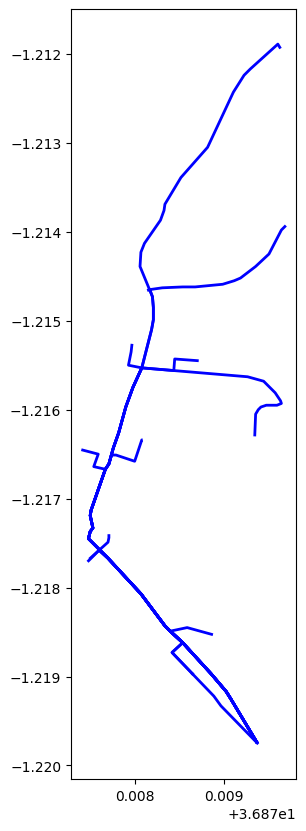

In [2]:
import geopandas as gpd
import pandas as pd
import os

# Set your folder path (Windows users: use raw string with 'r' or double backslashes)
folder_path = r"C:\Users\Admin\OneDrive - United States International University (USIU)\Documents\USIU_A\US2025\DSA2020A Leah\Projects\Car way"

# Collect all GeoJSON or JSON files in the folder
geojsons = []

for file in os.listdir(folder_path):
    if file.endswith(".json") or file.endswith(".geojson"):
        file_path = os.path.join(folder_path, file)
        gdf = gpd.read_file(file_path)
        geojsons.append(gdf)

# Combine them into a single GeoDataFrame
combined_gdf = gpd.GeoDataFrame(pd.concat(geojsons, ignore_index=True))

# Save combined GeoJSON (optional)
output_path = os.path.join(folder_path, "combined_car_routes.geojson")
combined_gdf.to_file(output_path, driver="GeoJSON")

# Preview and plot
print(combined_gdf.head())
combined_gdf.plot(figsize=(10, 10), color='blue', linewidth=2)


In [3]:
import geopandas as gpd
import pandas as pd
import os

# Your folder path
folder_path = r"C:\Users\Admin\OneDrive - United States International University (USIU)\Documents\USIU_A\US2025\DSA2020A Leah\Projects\Car way"
geojsons = []

for file in os.listdir(folder_path):
    if file.endswith(".json") or file.endswith(".geojson"):
        file_path = os.path.join(folder_path, file)
        gdf = gpd.read_file(file_path)

        # Try to extract route name from 'properties' — fallback to filename
        try:
            feature_name = gdf.iloc[0].get("name") or gdf.iloc[0]["properties"].get("name")
        except:
            feature_name = file.replace(".json", "").replace(".geojson", "")

        gdf["name"] = feature_name
        geojsons.append(gdf)

# Combine all routes
combined_gdf = gpd.GeoDataFrame(pd.concat(geojsons, ignore_index=True))

# Save to one file
output_path = os.path.join(folder_path, "combined_car_routes_named.geojson")
combined_gdf.to_file(output_path, driver="GeoJSON")

# Check output
print(combined_gdf[["name", "geometry"]].head())


                                                name  \
0  Adminstration Block Parking plot to Cafelatta ...   
1  Adminstration Block Parking plot to Lilian Bea...   
2                                combined_car_routes   
3                                combined_car_routes   
4                                combined_car_routes   

                                            geometry  
0  LINESTRING (36.87866 -1.21898, 36.87842 -1.218...  
1  LINESTRING (36.87866 -1.21898, 36.87842 -1.218...  
2  LINESTRING (36.87866 -1.21898, 36.87842 -1.218...  
3  LINESTRING (36.87866 -1.21898, 36.87842 -1.218...  
4  LINESTRING (36.87817 -1.21467, 36.87817 -1.214...  


In [4]:
import geopandas as gpd
import pandas as pd
import os

# Your folder path
folder_path = r"C:\Users\Admin\OneDrive - United States International University (USIU)\Documents\USIU_A\US2025\DSA2020A Leah\Projects\Car way"
geojsons = []

for file in os.listdir(folder_path):
    if file.endswith(".json") or file.endswith(".geojson"):
        file_path = os.path.join(folder_path, file)
        gdf = gpd.read_file(file_path)

        # Extract full route name from properties (e.g., "Admin Parking Plot to Cafelatta Lot")
        try:
            route_name = gdf.iloc[0].get("name") or gdf.iloc[0]["properties"].get("name")
        except:
            route_name = file.replace(".json", "").replace(".geojson", "")

        # Split into start and end names
        if " to " in route_name:
            start_name, end_name = route_name.split(" to ")
        else:
            start_name, end_name = route_name, "Unknown"

        # Extract coordinates from the LineString
        coords = list(gdf.geometry.iloc[0].coords)
        start_coord = coords[0]
        end_coord = coords[-1]

        # Add fields to GeoDataFrame
        gdf["route_name"] = route_name
        gdf["start_name"] = start_name
        gdf["end_name"] = end_name
        gdf["start_coord"] = [start_coord]
        gdf["end_coord"] = [end_coord]

        geojsons.append(gdf)

# Combine all routes
combined_gdf = gpd.GeoDataFrame(pd.concat(geojsons, ignore_index=True))

# Save as combined file
output_path = os.path.join(folder_path, "combined_car_routes_named.geojson")
combined_gdf.to_file(output_path, driver="GeoJSON")

# Preview structure
print(combined_gdf[["start_name", "end_name", "start_coord", "end_coord"]].head())


ValueError: Length of values (1) does not match length of index (14)

In [9]:
import geopandas as gpd
import pandas as pd
import os

# 1. Set your folder path containing all route files
folder_path = r"C:\Users\Admin\OneDrive - United States International University (USIU)\Documents\USIU_A\US2025\DSA2020A Leah\Projects\Car way"

# 2. Container for all route GeoDataFrames
geojsons = []

# 3. Loop through all files
for file in os.listdir(folder_path):
    if file.endswith(".json") or file.endswith(".geojson"):
        file_path = os.path.join(folder_path, file)
        gdf = gpd.read_file(file_path)

        # Try to get route name from properties or fallback to filename
        try:
            route_name = gdf.iloc[0].get("name") or gdf.iloc[0]["properties"].get("name")
        except:
            route_name = file.replace(".json", "").replace(".geojson", "")

        # Safely split route name into start and end names
        if " to " in route_name:
            start_name, end_name = route_name.split(" to ", 1)
        else:
            start_name, end_name = route_name, "Unknown"

        # Extract first and last coordinates from LineString geometry
        coords = list(gdf.geometry.iloc[0].coords)
        start_coord = coords[0]
        end_coord = coords[-1]

        # Assign all metadata to each row in the GeoDataFrame
        gdf["route_name"] = route_name
        gdf["start_name"] = start_name
        gdf["end_name"] = end_name
        gdf["start_coord"] = [start_coord] * len(gdf)
        gdf["end_coord"] = [end_coord] * len(gdf)

        geojsons.append(gdf)

# 4. Combine all route GeoDataFrames
combined_gdf = gpd.GeoDataFrame(pd.concat(geojsons, ignore_index=True))

# 5. Save to a new GeoJSON file
output_path = os.path.join(folder_path, "combined_car_routes_named.geojson")
combined_gdf.to_file(output_path, driver="GeoJSON")

# 6. Preview some results
print(combined_gdf[["route_name", "start_name", "end_name", "start_coord", "end_coord"]].head())


                                          route_name  \
0  Adminstration Block Parking plot to Cafelatta ...   
1  Adminstration Block Parking plot to Lilian Bea...   
2                                combined_car_routes   
3                                combined_car_routes   
4                                combined_car_routes   

                         start_name                   end_name  \
0  Adminstration Block Parking plot      Cafelatta Parking Lot   
1  Adminstration Block Parking plot  Lilian Beam (ICT Centere)   
2               combined_car_routes                    Unknown   
3               combined_car_routes                    Unknown   
4               combined_car_routes                    Unknown   

            start_coord             end_coord  
0  (36.87866, -1.21898)  (36.87747, -1.21771)  
1  (36.87866, -1.21898)  (36.87888, -1.21853)  
2  (36.87866, -1.21898)  (36.87747, -1.21771)  
3  (36.87866, -1.21898)  (36.87747, -1.21771)  
4  (36.87866, -1.21898)  (

Build the Graph

In [11]:
import networkx as nx
from shapely.geometry import LineString
from math import sqrt

# Initialize graph
G = nx.Graph()

# Loop over each route in the GeoDataFrame
for _, row in combined_gdf.iterrows():
    start = row["start_name"]
    end = row["end_name"]
    geom = row.geometry

    # Use straight-line (Euclidean) distance as weight
    coords = list(geom.coords)
    start_coord = coords[0]
    end_coord = coords[-1]

    def euclidean_distance(a, b):
        return sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

    distance = euclidean_distance(start_coord, end_coord)

    # Add nodes with coordinates (for mapping)
    G.add_node(start, coord=start_coord)
    G.add_node(end, coord=end_coord)

    # Add edge with geometry and weight
    G.add_edge(start, end, weight=distance, geometry=geom, name=row["route_name"])


Find Shortest Path Between Named Locations

In [14]:

source = "Adminstration Block Parking plot"
target = "Cafelatta Parking Lot"

if nx.has_path(G, source, target):
    path = nx.shortest_path(G, source=source, target=target, weight="weight")
    print("✅ Shortest path:", " ➝ ".join(path))
else:
    print("⚠️ No path found between the selected locations.")


✅ Shortest path: Adminstration Block Parking plot ➝ Cafelatta Parking Lot


In [13]:
print("📌 All nodes in G:")
for node in G.nodes:
    print("-", node)


📌 All nodes in G:
- Adminstration Block Parking plot
- Cafelatta Parking Lot
- Lilian Beam (ICT Centere)
- combined_car_routes
- Unknown
- School of Humanities
- School of Humanities Parking Plot
- USIU Gate A
- Adminstration to Bus Paking Plot
- Adminstration to Cafelatta Parking Lot
- Adminstration to Frieda Brown Parking Plot
- Adminstration to School Hostel(Cfaelatta)
- Auditoruim Parking
- Football and Rugby Feild
- Library Parking Plot
- Science Complex Parking Plot
- Swimming Pool Parking


## Pedestrian 

In [15]:
import geopandas as gpd
import pandas as pd
import os

# Set your pedestrian routes folder path
folder_path = r"C:\Users\Admin\OneDrive - United States International University (USIU)\Documents\USIU_A\US2025\DSA2020A Leah\Projects\Pedistrain Way"

geojsons = []

for file in os.listdir(folder_path):
    if file.endswith(".json") or file.endswith(".geojson"):
        file_path = os.path.join(folder_path, file)
        gdf = gpd.read_file(file_path)

        # Since your sample doesn't have properties.name, fallback to filename
        route_name = file.replace(".json", "").replace(".geojson", "")

        # Extract start and end names from filename if format is "Start to End"
        if " to " in route_name:
            start_name, end_name = route_name.split(" to ", 1)
        else:
            start_name, end_name = route_name, "Unknown"

        # Extract first and last coordinates from LineString geometry
        coords = list(gdf.geometry.iloc[0].coords)
        start_coord = coords[0]
        end_coord = coords[-1]

        gdf["route_name"] = route_name
        gdf["start_name"] = start_name
        gdf["end_name"] = end_name
        gdf["start_coord"] = [start_coord] * len(gdf)
        gdf["end_coord"] = [end_coord] * len(gdf)

        geojsons.append(gdf)

combined_gdf = gpd.GeoDataFrame(pd.concat(geojsons, ignore_index=True))

output_path = os.path.join(folder_path, "combined_pedestrian_routes_named.geojson")
combined_gdf.to_file(output_path, driver="GeoJSON")

print(combined_gdf[["route_name", "start_name", "end_name", "start_coord", "end_coord"]].head())


                                          route_name  \
0  Adminstartion Block Parking Lot to Adminstarti...   
1  Adminstartion Block Parking Lot to Lilian Buil...   
2    Adminstartion Block Parking Lot to Paul's Caffe   
3  Adminstartion Stting Area to Lilian Beam Build...   
4         Auditoruim to Frieda Brown Student Centere   

                        start_name                           end_name  \
0  Adminstartion Block Parking Lot                Adminstartion Block   
1  Adminstartion Block Parking Lot                    Lilian Building   
2  Adminstartion Block Parking Lot                       Paul's Caffe   
3        Adminstartion Stting Area  Lilian Beam Building(ICT Cenetre)   
4                       Auditoruim       Frieda Brown Student Centere   

            start_coord             end_coord  
0  (36.87886, -1.21896)   (36.8789, -1.21885)  
1  (36.87886, -1.21897)  (36.87888, -1.21854)  
2  (36.87886, -1.21897)   (36.8784, -1.21849)  
3  (36.87888, -1.21853)  (36.879